### Project - Programming for Data Analysis
For this project I have created a data set by simulating a real-world phenomenon (what is that).  This was done by modelling and synthesising the data using Python, using the numpy.random package. <br>
The project requirements ask the user to choose a real-world phenomenon that can be measured and with at least one-hundred data points across at least four different variables. Additional requirements include <br>
• Investigate the types of variables involved, their likely distributions, and their relationships with each other. <br>
• Synthesise/simulate a data set as closely matching their properties as possible. <br>
• Detail the research and implement the simulation in a Jupyter notebook - the data set itself can simply be displayed in an output cell within the notebook. <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from information from stackoverflow https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
url="http://www.sfi.ie/about-us/women-in-science/gender/SFIGenderDashboard_TableauPublic_2019.csv"
df=pd.read_csv(url)
df


,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount funded
0,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,480000.0,NaN
1,SFI Investigator Programme / Principal Investi...,2014,Declined,Female,790000.0,NaN
2,SFI Investigator Project Award,2012,Declined,Female,200000.0,NaN
3,SFI Starting Investigator Research Grant,2018,Declined,Female,400000.0,NaN
4,SFI Investigator Programme / Principal Investi...,2013,Declined,Male,580000.0,NaN
...,...,...,...,...,...,...
2773,SFI Research Centres,2012,Declined,Male,13650000.0,NaN
2774,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,1090000.0,NaN
2775,SFI Investigator Programme / Principal Investi...,2016,Awarded,Male,2000000.0,2000000.0
2776,SFI Industry Fellowship,2016,Awarded,Female,60000.0,50000.0


In [3]:
# provides an array of the headings for the data
df.columns

Index(['Programme Name', 'Year', 'Award Status', 'Applicant Gender',
       'Amount Requested', 'Amount funded '],
      dtype='object')

In [4]:
df.describe()

,Year,Amount Requested,Amount funded
count,2778.000000,2.719000e+03,8.050000e+02
mean,2014.595392,1.013064e+06,9.535068e+05
std,2.060589,3.243045e+06,3.311285e+06
min,2011.000000,0.000000e+00,0.000000e+00
25%,2013.000000,1.000000e+05,9.000000e+04
50%,2015.000000,4.200000e+05,2.400000e+05
75%,2016.000000,8.700000e+05,7.000000e+05
max,2018.000000,4.794000e+07,4.444000e+07


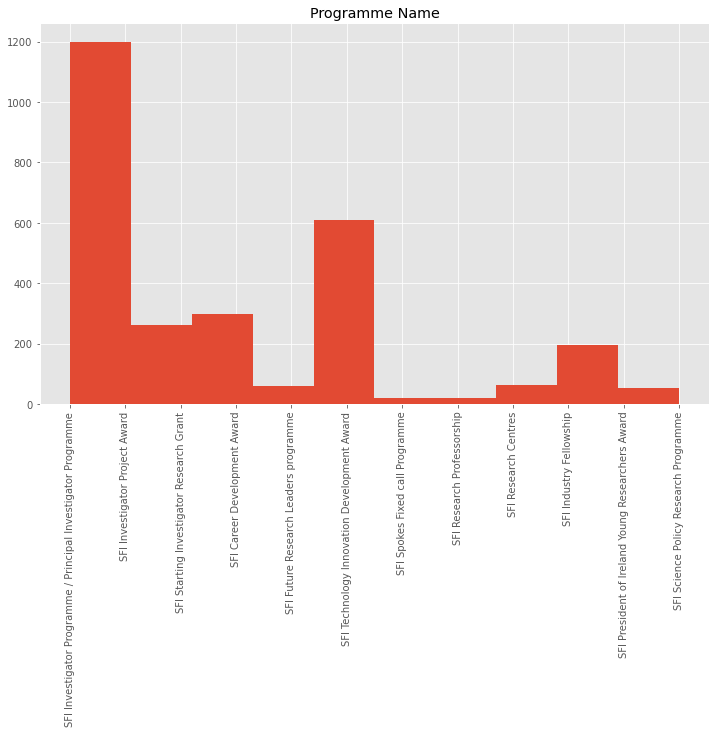

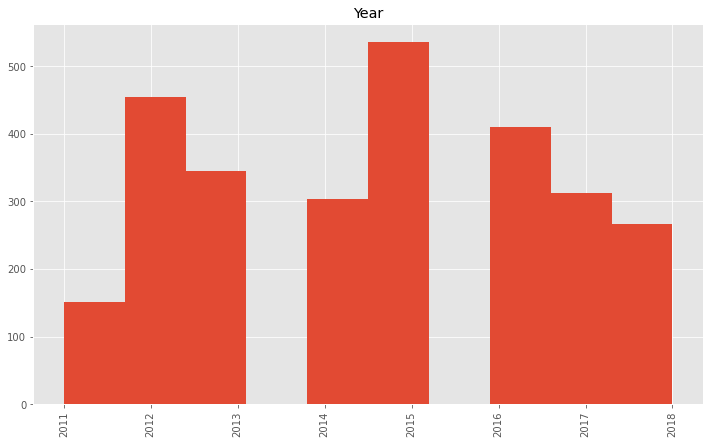

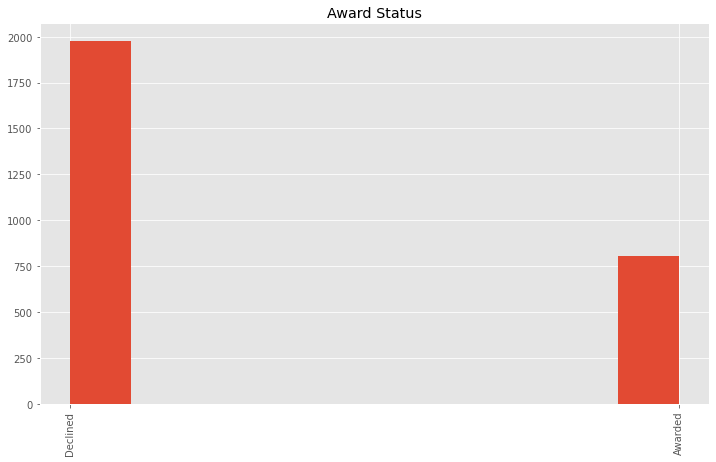

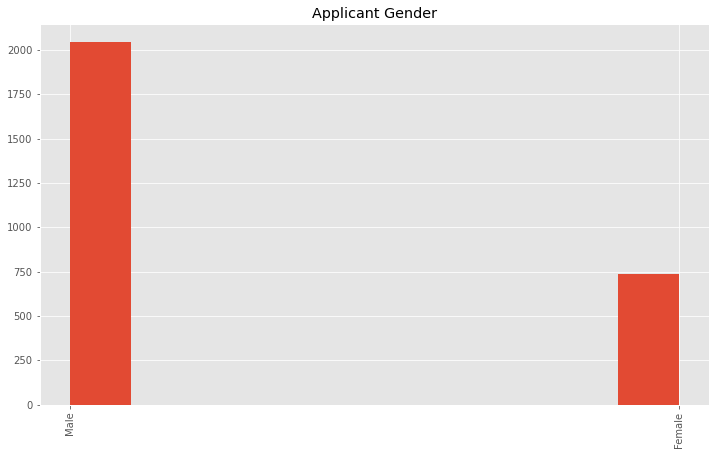

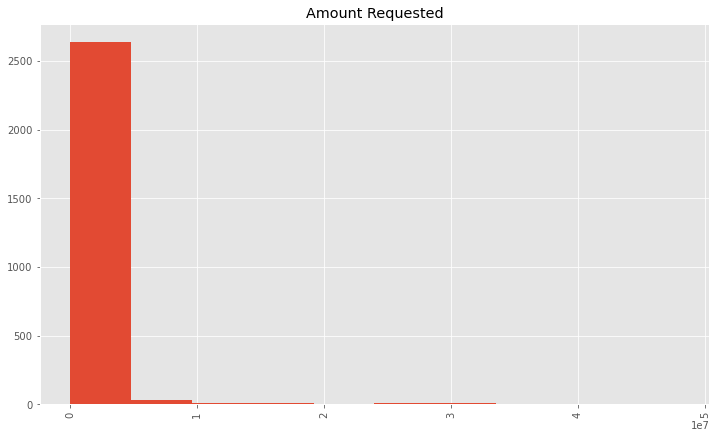

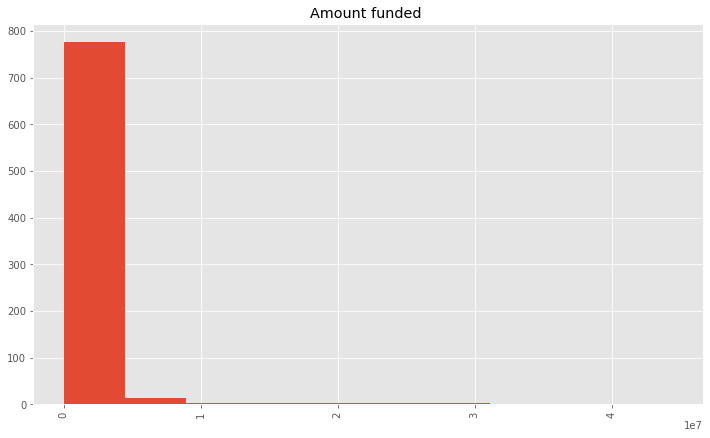

In [5]:

# the for loop will iterate through and develop histograms for each column as defined by the dataframe above
# this will help us to understand the distribution of each variable
# use nicer and bigger plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(12,7)

for col_name in df.columns[0:6]:
    # create a histogram for each of the variables
    plt.hist(df[col_name])
    plt.title(col_name)
    # rotate the information on the x axis to aid reader 
    # from https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
    plt.xticks(rotation=90)
    plt.yticks()
    plt.show()

In [6]:
# define the function as used in Assignment for Fundementals of Data Analysis
def count(y):
    # create a dictionary which will use input as keys and the number of times each item appears in the input list as the values
    d = {}
    for i in y:
         # using .get method returns the value for the given key, if present in the dictionary 
         #If not, then it will return none [2, 3].
        d[i] = d.get(i, 0) + 1
    return d

# now to look at the number of items in each of the columns 
my_list = df["Award Status"]

# now we call the function
count(my_list)


{'Declined': 1974, 'Awarded': 804}

***
## Removing missing data

In [21]:
# as there are a number of rows with missing data in the Amount Requested column I can remove these 
# using guidance from https://machinelearningmastery.com/handle-missing-data-python/
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# drop rows with missing values in the column "Award Requested"
#df.dropna(subset=['Amount Requested'])


In [16]:
# now to look at the number of items in each of the columns 
#my_list = df["Amount Requested"]

# now we call the function
#count(my_list)